<a href="https://colab.research.google.com/github/JUSTYNAYANG/summerpy/blob/main/09132023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data From Google Maps

In [99]:
import requests

In [100]:
url = "https://mt.google.com/vt/lyrs=s&x=0&y=0&z=0"

In [101]:
r = requests.get(url)

In [102]:
#          file name      save as picture
with open("worldmap.jpg", "wb") as f:
#         put requests into the file
  f.write(r.content)

#PIL Image

In [103]:
from PIL import Image

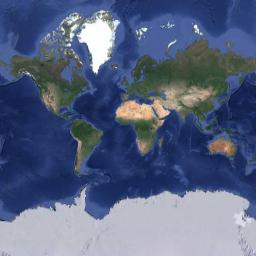

In [104]:
Image.open("worldmap.jpg")

#Zoom = 1

In [105]:
#0,0 Top left corner
#0,1 Bottom left corner
#1,0 Top right corner
#1,1 Bottom right corner

In [106]:
url1 = "https://mt.google.com/vt/lyrs=s&x=0&y=0&z=1"

In [107]:
r = requests.get(url1)

In [108]:
with open("worldmap1.jpg", "wb") as f:
  f.write(r.content)

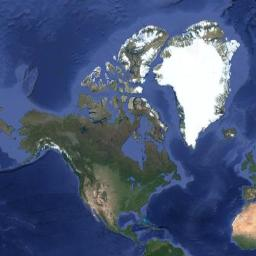

In [109]:
Image.open("worldmap1.jpg")

In [110]:
url2 = "https://mt.google.com/vt/lyrs=s&x=1&y=0&z=1"

In [111]:
r = requests.get(url2)

In [112]:
with open("worldmap2.jpg", "wb") as f:
  f.write(r.content)

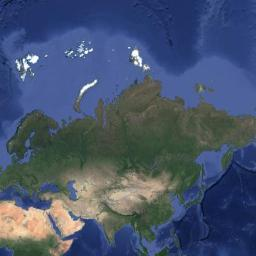

In [113]:
Image.open("worldmap2.jpg")

In [114]:
#one image is 256x256 at zoom 1

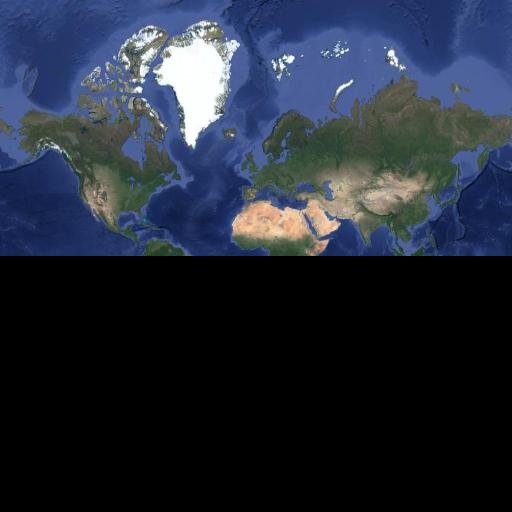

In [115]:
i = Image.open("worldmap1.jpg")
a = Image.open("worldmap2.jpg")

width, height = 512, 512
new_image = Image.new("RGB", (width, height))

new_image.paste(i, (0, 0))
new_image.paste(a, (256, 0))
new_image

In [116]:
width, height = 512, 512
new_image = Image.new("RGB", (width, height))

for i in range(2):
  for j in range(2):
    w = 256 * i
    h = 256 * j
    url = f"https://mt.google.com/vt/lyrs=s&x={i}&y={j}&z=1"
    r = requests.get(url)
    with open(f"worldmap.jpg", "wb") as f:
      f.write(r.content)
    image = Image.open("worldmap.jpg")
    new_image.paste(image, (w, h))


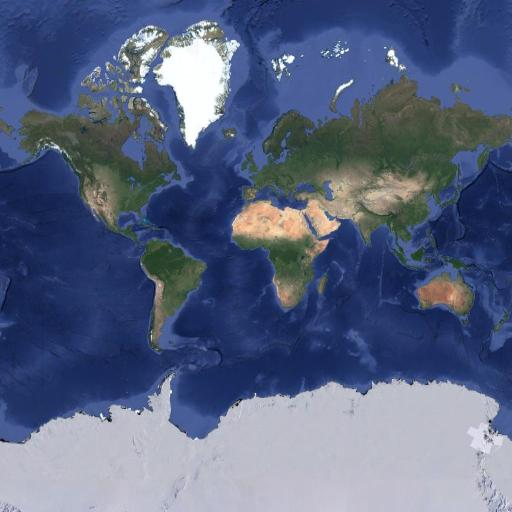

In [117]:
new_image

# using io to not save picture as file and merging them together

In [118]:
import io
def get_image(url):
  r = requests.get(url)
  return Image.open(io.BytesIO(r.content))

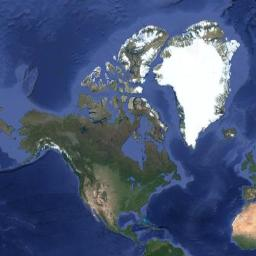

In [119]:
get_image("https://mt.google.com/vt/lyrs=s&x=0&y=0&z=1")

In [120]:
width, height = 512, 512
new_image1 = Image.new("RGB", (width, height))

for i in range(2):
  for j in range(2):
    w = 256 * i
    h = 256 * j
    url = f"https://mt.google.com/vt/lyrs=s&x={i}&y={j}&z=1"
    image = get_image(url)
    new_image1.paste(image, (w, h))

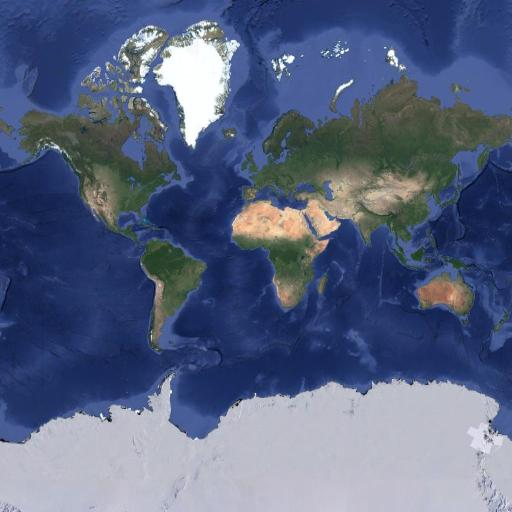

In [121]:
new_image1